In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Membaca data
data = pd.read_csv('data iris.csv', delimiter=';')
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

# Membagi data menjadi training dan testing dataset
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print("Data Training:", len(features_train))
print("Data Testing:", len(features_test))


Data Training: 105
Data Testing: 45


In [2]:
import numpy as np
import pandas as pd

# Membaca dataset
data = pd.read_csv('data iris.csv', delimiter=';')
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

# Menentukan rasio split (contoh: 70% training, 30% testing)
split_ratio = 0.7
split_index = int(split_ratio * len(features))

# Mengacak data secara acak
indices = np.random.permutation(len(features))

# Membagi data
train_indices = indices[:split_index]
test_indices = indices[split_index:]

features_train = features[train_indices]
labels_train = labels[train_indices]
features_test = features[test_indices]
labels_test = labels[test_indices]

print("Data Training:", len(features_train))
print("Data Testing:", len(features_test))


Data Training: 105
Data Testing: 45


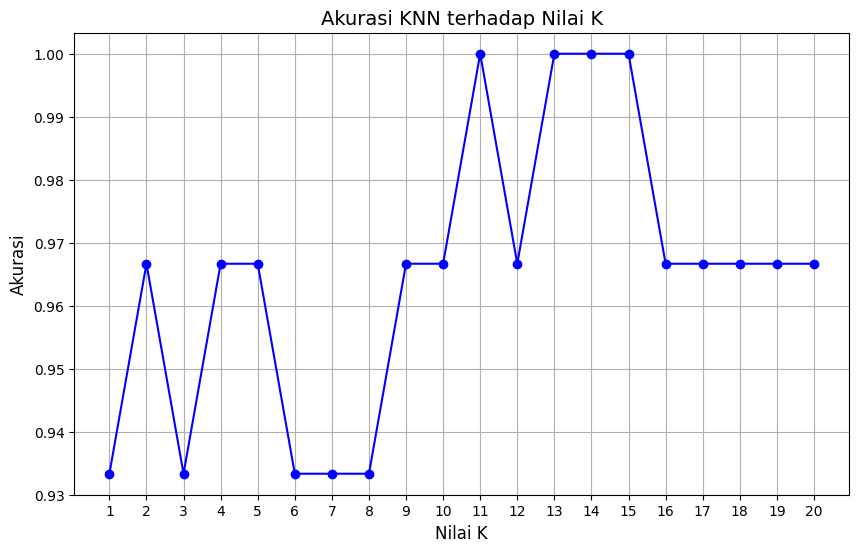

Nilai K terbaik: 11 dengan akurasi: 1.00


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Fungsi untuk memuat data
def load_data(filename):
    data = pd.read_csv(filename, delimiter=';')
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values
    return features, labels

# Fungsi untuk membagi data secara random
def split_data(features, labels, test_size=0.2):
    data = list(zip(features, labels))
    random.shuffle(data)
    features, labels = zip(*data)
    
    split_index = int(len(features) * (1 - test_size))
    train_features = np.array(features[:split_index])
    train_labels = np.array(labels[:split_index])
    test_features = np.array(features[split_index:])
    test_labels = np.array(labels[split_index:])
    
    return train_features, train_labels, test_features, test_labels

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Fungsi KNN
def knn_classify(features, labels, test_point, k=5):
    distances = np.array([euclidean_distance(feature, test_point) for feature in features])
    nearest_indices = distances.argsort()[:k]
    nearest_labels = labels[nearest_indices]
    unique_labels, counts = np.unique(nearest_labels, return_counts=True)
    most_common = unique_labels[np.argmax(counts)]
    return most_common

# Fungsi untuk menghitung akurasi
def calculate_accuracy(features, labels, test_features, test_labels, k):
    correct_predictions = 0
    for i in range(len(test_features)):
        prediction = knn_classify(features, labels, test_features[i], k)
        if prediction == test_labels[i]:
            correct_predictions += 1
    return correct_predictions / len(test_labels)

# Fungsi untuk mencari nilai K terbaik
def find_best_k(train_features, train_labels, test_features, test_labels, max_k=20):
    k_values = range(1, max_k + 1)
    accuracies = []

    for k in k_values:
        accuracy = calculate_accuracy(train_features, train_labels, test_features, test_labels, k)
        accuracies.append(accuracy)

    best_k = k_values[np.argmax(accuracies)]
    best_accuracy = max(accuracies)

    # Visualisasi grafik akurasi
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.title('Akurasi KNN terhadap Nilai K', fontsize=14)
    plt.xlabel('Nilai K', fontsize=12)
    plt.ylabel('Akurasi', fontsize=12)
    plt.grid(True)
    plt.xticks(k_values)
    plt.show()

    return best_k, best_accuracy

# Main
filename = 'data iris.csv'  # Ganti dengan nama file Anda
features, labels = load_data(filename)
train_features, train_labels, test_features, test_labels = split_data(features, labels)

best_k, best_accuracy = find_best_k(train_features, train_labels, test_features, test_labels, max_k=20)

print(f"Nilai K terbaik: {best_k} dengan akurasi: {best_accuracy:.2f}")


Nilai K terbaik: 14 dengan akurasi: 0.98


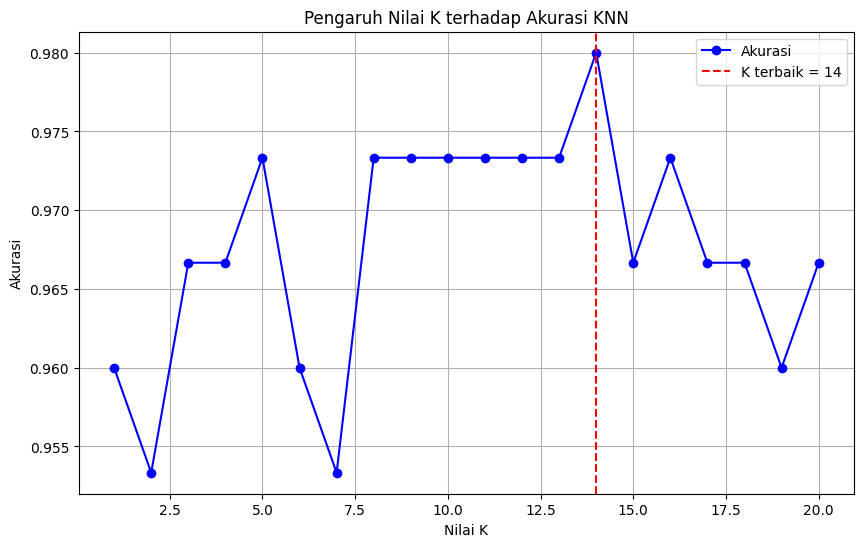

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Fungsi untuk memuat data
def load_data(filename):
    data = pd.read_csv(filename, delimiter=';')
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values
    return features, labels

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Fungsi KNN
def knn_classify(features, labels, test_point, k=3):
    distances = np.array([euclidean_distance(feature, test_point) for feature in features])
    nearest_indices = distances.argsort()[:k]
    nearest_labels = labels[nearest_indices]
    unique_labels, counts = np.unique(nearest_labels, return_counts=True)
    most_common = unique_labels[np.argmax(counts)]
    return most_common

# Fungsi untuk mencari akurasi KNN
def calculate_knn_accuracy(features, labels, k, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    
    for train_index, test_index in kf.split(features):
        train_features, test_features = features[train_index], features[test_index]
        train_labels, test_labels = labels[train_index], labels[test_index]
        
        predictions = [knn_classify(train_features, train_labels, test_point, k) for test_point in test_features]
        acc = accuracy_score(test_labels, predictions)
        accuracies.append(acc)
    
    return np.mean(accuracies)

# Load data
filename = 'data iris.csv'
features, labels = load_data(filename)

# Cari nilai K terbaik
max_k = 20  # Ubah jika ingin mencoba nilai K lebih besar
accuracies = []
k_values = range(1, max_k + 1)

for k in k_values:
    acc = calculate_knn_accuracy(features, labels, k, n_splits=10)  # 10-fold cross-validation
    accuracies.append(acc)

# Tentukan nilai K terbaik
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Nilai K terbaik: {best_k} dengan akurasi: {best_accuracy:.2f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Akurasi")
plt.axvline(x=best_k, color='r', linestyle='--', label=f"K terbaik = {best_k}")
plt.title("Pengaruh Nilai K terhadap Akurasi KNN")
plt.xlabel("Nilai K")
plt.ylabel("Akurasi")
plt.legend()
plt.grid()
plt.show()
